# Notebook to plot Orca Calls from Hydrophone data

This notebook uses python to read hydrophone data provided by https://github.com/orcasound/orcadata/wiki and start exploring the feature space of the data that will help us build a detection/classification system.

Made (shamelessly) by Marine Denolle (mdenolle@uw.edu) 2/16/24



In [1]:
# !pip install librosa
# !pip freeze > requirements.txt

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import obspy

In [8]:
# Load the audio file
audio_path = './data/call-examples.mp3'
y, sr = librosa.load(audio_path) # data, sampling rate
print(sr)

22050


In [15]:
# create a time vector
t = np.linspace(0,y.shape[0]/sr,y.shape[0])
print(t[0],t[-1])

0.0 27.539863945578233


## Plot data



Text(0, 0.5, 'Mysterious unit')

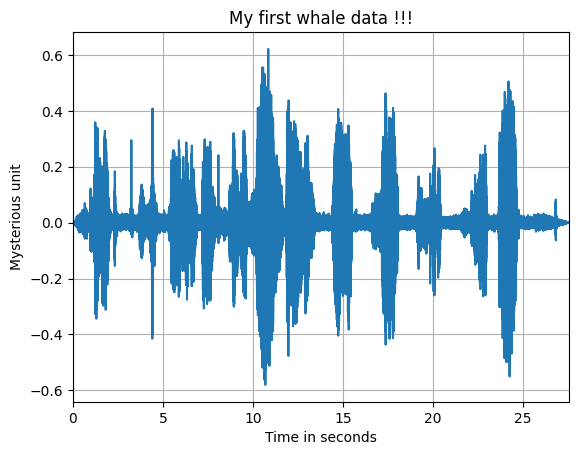

In [20]:
plt.plot(t,y);plt.xlabel('Time in seconds')
plt.grid(True)
plt.title('My first whale data !!!')
plt.xlim([t[0],t[-1]])
plt.ylabel('Mysterious unit')

## FFT to get the harmonics

In [21]:
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()


In [34]:
n_fft = y.shape[0] #next_power_of_2(y.shape[0])
freqs = np.fft.rfftfreq(n_fft, d=1/sr)
fft_result = np.fft.rfft(y,n_fft)
print(fft_result.shape,freqs.shape)

(303628,) (303628,)


In [29]:
freqs

array([0.00000000e+00, 3.63110000e-02, 7.26220000e-02, ...,
       1.10249274e+04, 1.10249637e+04, 1.10250000e+04])

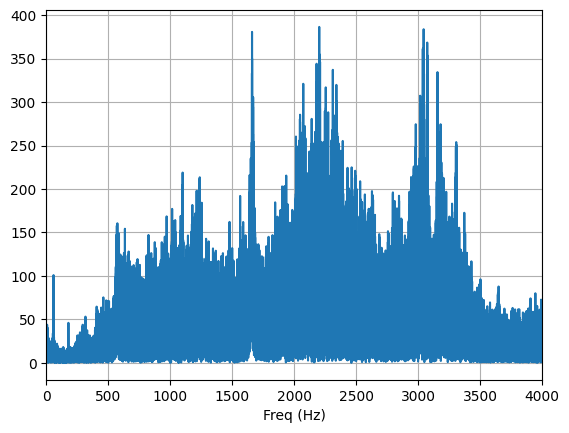

In [36]:
plt.plot(freqs,np.abs(fft_result))
plt.xlabel('Freq (Hz)');plt.xlim([0,4000])
plt.grid(True)

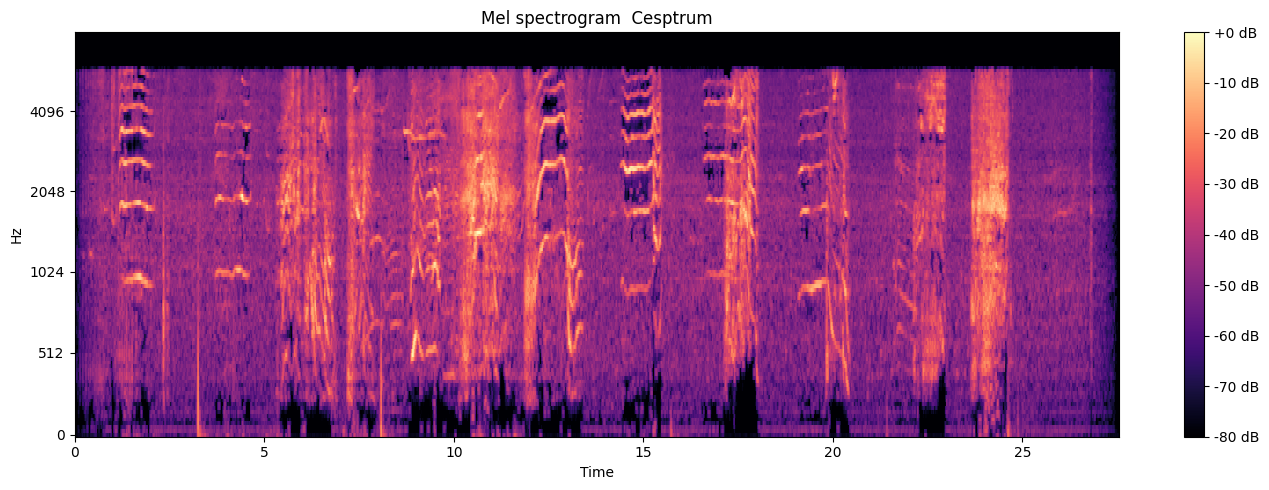

In [11]:

# Create the spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram  Cesptrum')
plt.tight_layout()
plt.show()


## Detect the orca with conventional seismology



In [43]:
import obspy.signal.trigger
F_max = 1600 # Hz

st_window = 2/F_max # short window in seconds
lt_window = 5/F_max # long window in seconds


crap = obspy.signal.trigger.recursive_sta_lta(y,int(sr*st_window),int(sr*lt_window))

(0.0, 3.0)

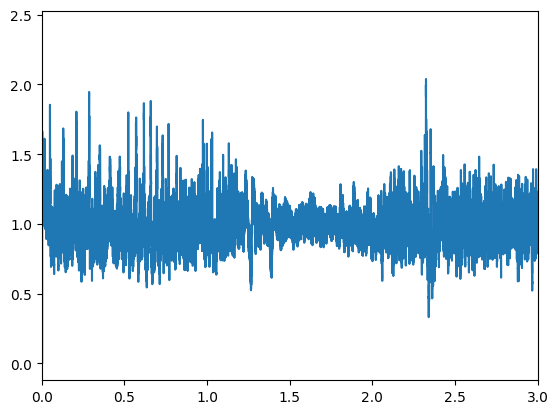

In [44]:
plt.plot(t,crap);plt.xlim([0,3])

In [47]:
obspy.signal.trigger.plot_trigger(y,crap,1.5,1)

AttributeError: 'numpy.ndarray' object has no attribute 'stats'